In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('flights.csv')

# Display the first few rows
df.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [3]:
# Identify null values
null_values = df.isnull().sum()
null_values


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [4]:
# replace null values with 0
null_values.fillna(0, inplace=True)

In [5]:
# show departures that were delayed by more than 15 minutes
df[df['DepDel15'].isnull()]['DepDelay']

#update DelDel15 to 0 if null
df['DepDel15'].fillna(0, inplace=True)

In [6]:
# normalize the data by removing outliers from depdelay and arrdelay

# Calculate the z-scores of depdelay and arrdelay
z_scores = (df[['DepDelay', 'ArrDelay']] - df[['DepDelay', 'ArrDelay']].mean()) / df[['DepDelay', 'ArrDelay']].std()

# Calculate the absolute z-scores
abs_z_scores = z_scores.abs()

# Get the rows with outliers
outliers = (abs_z_scores > 3).any(axis=1)

# Remove the outliers
df = df[~outliers]


In [7]:
# show newly cleaned data
df.head(20)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1759,40,1.0,2107,10,0,0
10,2013,6,9,7,OO,12892,Los Angeles International,Los Angeles,CA,14679,San Diego International,San Diego,CA,1404,3,0.0,1507,-8,0,0


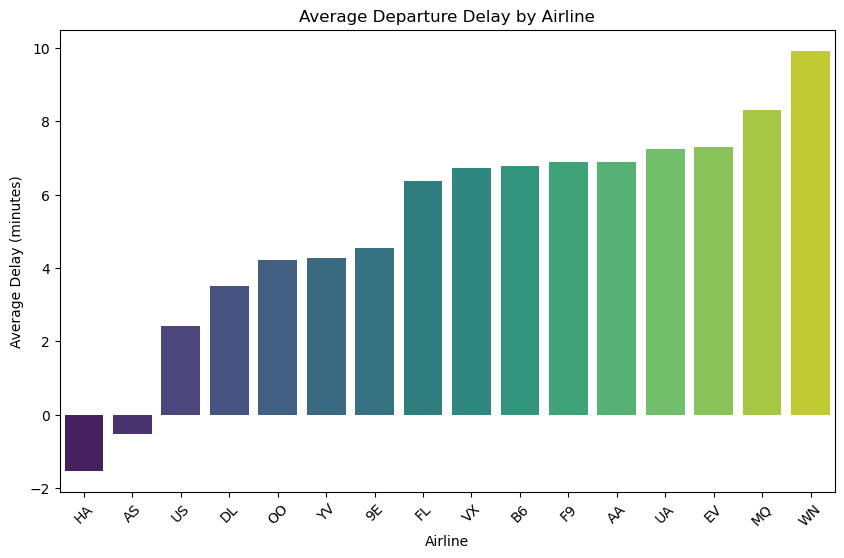

In [8]:
# Create a chatrt showing average departure delay by airline
import matplotlib.pyplot as plt
import seaborn as sns

# Group by airline and calculate average departure delay
average_delay = df.groupby('Carrier')['DepDelay'].mean()

# Sort the average delay in ascending order
average_delay = average_delay.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_delay.index, y=average_delay.values, palette='viridis')
plt.title('Average Departure Delay by Airline')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()

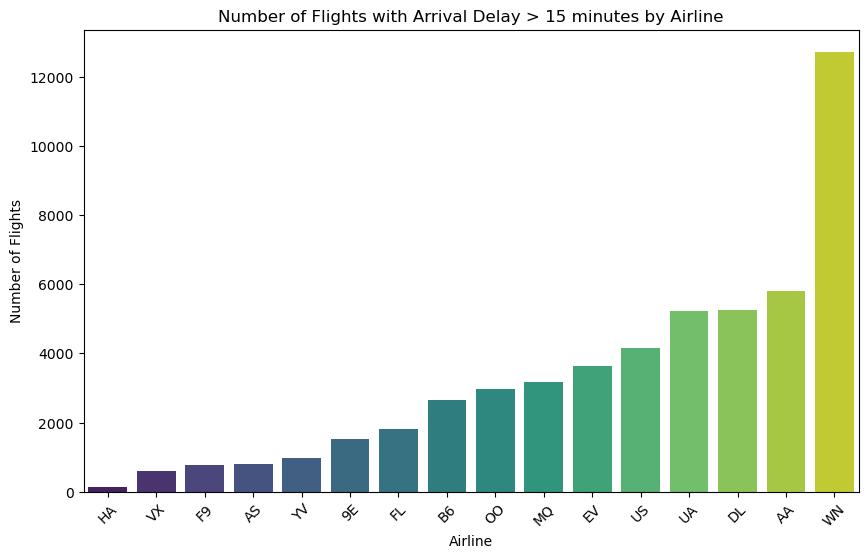

In [69]:
# Create a bar chart showing arrival delay that was greater than 15 minutes by airline

# Group by airline and calculate the number of delayed flights
delayed_flights = df[df['ArrDel15'] == 1].groupby('Carrier').size()

# Sort the number of delayed flights in ascending order
delayed_flights = delayed_flights.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=delayed_flights.index, y=delayed_flights.values, palette='viridis')
plt.title('Number of Flights with Arrival Delay > 15 minutes by Airline')
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()

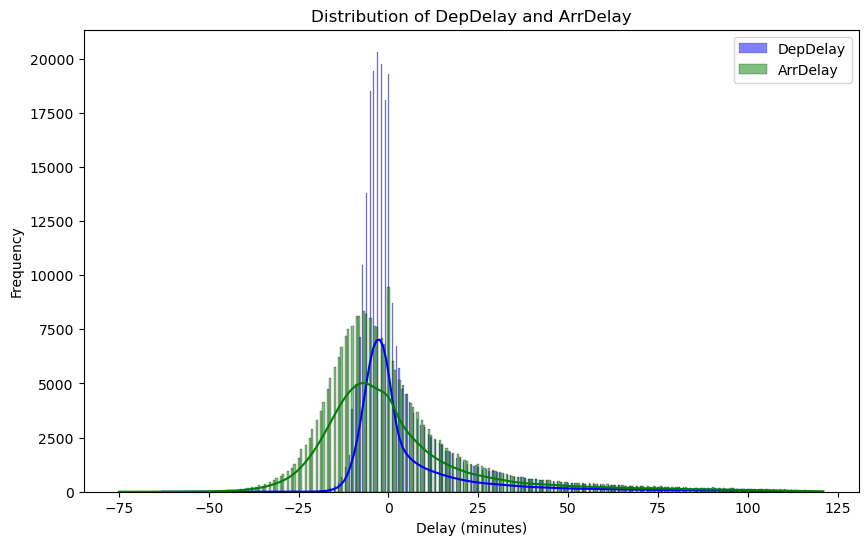

In [70]:
# Plot the distribution of DepDelay and ArrDelay
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DepDelay', kde=True, color='blue', label='DepDelay')
sns.histplot(data=df, x='ArrDelay', kde=True, color='green', label='ArrDelay')
plt.title('Distribution of DepDelay and ArrDelay')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


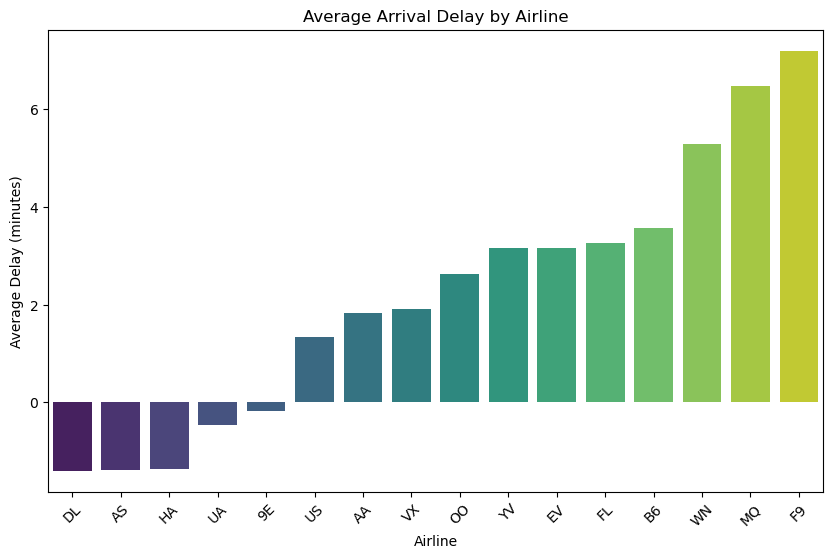

In [9]:
# Calculate the average arrival delay by carrier
average_arrival_delay = df.groupby('Carrier')['ArrDelay'].mean()

# Sort the average arrival delay in ascending order
average_arrival_delay = average_arrival_delay.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_arrival_delay.index, y=average_arrival_delay.values, palette='viridis')
plt.title('Average Arrival Delay by Airline')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()


In [10]:
# which route has the highest average arrival delay
average_arrival_delay_route = df.groupby(['OriginCity', 'DestCity'])['ArrDelay'].mean()
average_arrival_delay_route


OriginCity                  DestCity         
Albuquerque                 Atlanta              -3.301887
                            Baltimore            -4.789474
                            Chicago              10.354167
                            Dallas                5.551020
                            Dallas/Fort Worth     3.847953
                                                   ...    
West Palm Beach/Palm Beach  Philadelphia         -6.000000
                            Pittsburgh           10.000000
                            Providence          -14.000000
                            San Juan              4.466667
                            Washington            2.000000
Name: ArrDelay, Length: 2188, dtype: float64

In [11]:
# which route has the most late arrivals from origin airport to destination airport?

# Group by origin and destination cities and calculate the number of delayed flights
delayed_flights_route = df[df['ArrDel15'] == 1].groupby(['OriginCity', 'DestCity']).size()

# Sort the number of delayed flights in ascending order
delayed_flights_route = delayed_flights_route.sort_values(ascending=True)

# Display the top 10 routes with the most delayed flights
delayed_flights_route.tail(10)

OriginCity     DestCity     
Atlanta        New York         170
               Chicago          170
New York       Chicago          178
Chicago        Atlanta          188
New York       Atlanta          191
               Washington       194
Chicago        New York         203
Washington     New York         216
San Francisco  Los Angeles      257
Los Angeles    San Francisco    274
dtype: int64

In [12]:
# which departure airport has the highest average departure delay?
average_departure_delay_airport = df.groupby('OriginCity')['DepDelay'].mean()

# Sort the average departure delay in ascending order
average_departure_delay_airport = average_departure_delay_airport.sort_values(ascending=True)
average_departure_delay_airport

OriginCity
Anchorage             0.449799
Kahului               0.500436
Long Beach            0.823386
Tucson                0.983471
Honolulu              1.600116
                       ...    
Baltimore             8.687328
Dallas                9.067149
Dallas/Fort Worth     9.599112
Denver                9.852287
Chicago              10.471936
Name: DepDelay, Length: 66, dtype: float64

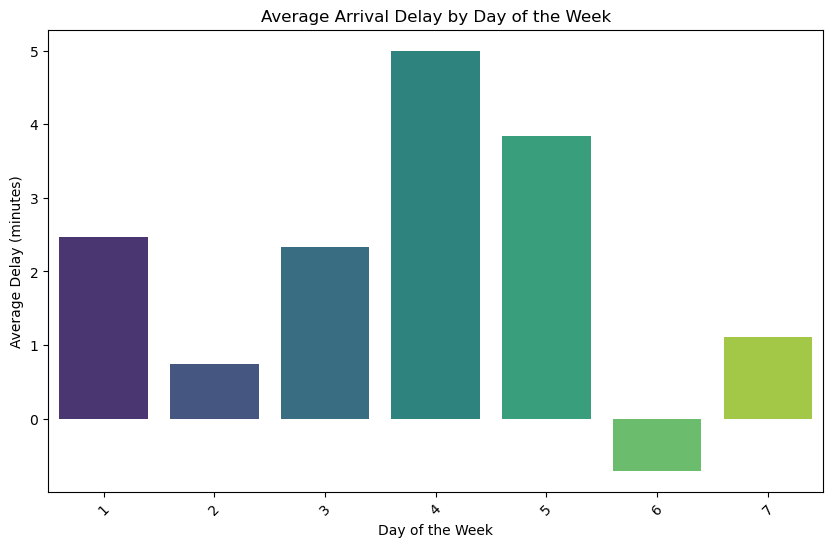

In [13]:
# what are the arrival delays for different days of teh week?

# Group by day of the week and calculate the average arrival delay
average_arrival_delay_day = df.groupby('DayOfWeek')['ArrDelay'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_arrival_delay_day.index, y=average_arrival_delay_day.values, palette='viridis')
plt.title('Average Arrival Delay by Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

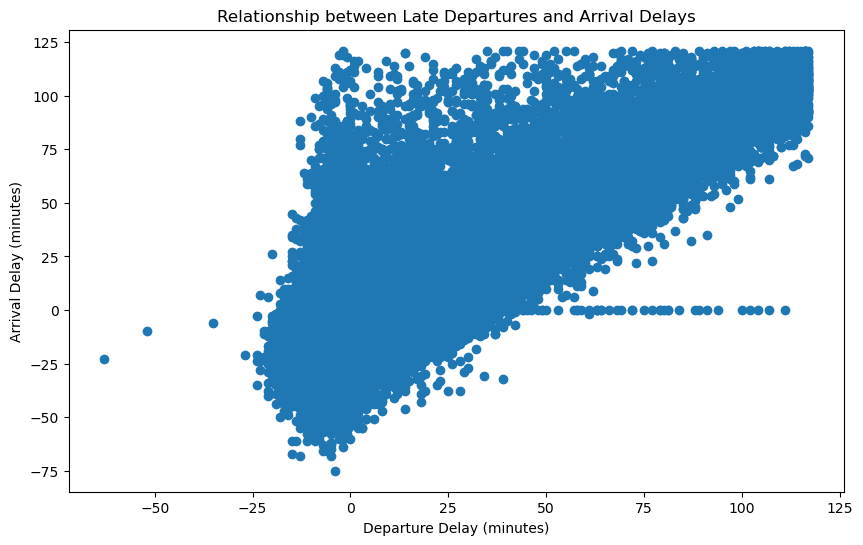

In [76]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['DepDelay'], df['ArrDelay'])
plt.title('Relationship between Late Departures and Arrival Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


In [15]:
# Create a model to predict the likelihood of a flight being delayed based on the day of the week and the arrival airport
# use a logistic regression model
# split the date into training and testing sets
# train the model
# calculate the accuracy of the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Select the features and the target variable
X = df[['DayOfWeek', 'DestAirportID']]
y = df['ArrDel15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a logistic regression model
model = LogisticRegression(solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
model.score(X_test, y_test)


0.8014746520625031

In [17]:
# show confusion matrix
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[63807,     0],
       [15805,     0]])

In [18]:
# show the odds of a flight being delayed to Chicago on a Monday

# Create a dataframe with the input values
data = {'DayOfWeek': [1], 'DestAirportID': [13930]}
input_values = pd.DataFrame(data)

# Make a prediction
prediction = model.predict_proba(input_values)

# Show the prediction
prediction[0]

array([0.82251435, 0.17748565])

In [19]:
# Show the odds of a flight being delayed to Las Vegas on a Friday

# Create a dataframe with the input values
data = {'DayOfWeek': [5], 'DestAirportID': [12889]}
input_values = pd.DataFrame(data)

# Make a prediction
prediction = model.predict_proba(input_values)

# Show the prediction
prediction[0]

array([0.80516253, 0.19483747])

In [21]:
# Make a prediction of the odds of a flight being delayed to Los Angeles on a Wednesday

# Create a dataframe with the input values
data = {'DayOfWeek': [3], 'DestAirportID': [12892]}

# Make a prediction
input_values = pd.DataFrame(data)

# Make a prediction
prediction = model.predict_proba(input_values)

# Show the prediction
prediction[0]

array([0.80521432, 0.19478568])

In [22]:
# Make a prediction of the odds of a flight being delayed to San Francisco on a Thursday

# Create a dataframe with the input values
data = {'DayOfWeek': [4], 'DestAirportID': [14771]}
input_values = pd.DataFrame(data)

# Make a prediction
prediction = model.predict_proba(input_values)

# Show the prediction
prediction[0]

array([0.83562881, 0.16437119])

In [23]:
# Get unique column values for origin airport and id and export to CSV
origin_airport = df[['OriginAirportID', 'OriginAirportName']].drop_duplicates()
origin_airport.to_csv('origin_airport.csv', index=False)


In [25]:
# export the model to import later into Flask
import pickle

pickle.dump(model, open('server/model.pkl', 'wb'))